In [2]:
import urllib
url = "https://www.imdb.com/title/tt0108778/fullcredits?ref_=tt_cl_sm#cast"
response = urllib.request.urlopen(url)

In [3]:
s = response.read()
print(s[:500])

b'\n\n \n\n\n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///title/tt0108778?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n  '


In [6]:
from bs4 import BeautifulSoup
doc = BeautifulSoup(s)

In [44]:
anchors = doc.select('.cast_list tr td.primary_photo a')
print(anchors[:3])

[<a href="/name/nm0000098/?ref_=ttfc_fc_cl_i1"><img alt="Jennifer Aniston" class="loadlate hidden " height="44" loadlate="https://m.media-amazon.com/images/M/MV5BNjk1MjIxNjUxNF5BMl5BanBnXkFtZTcwODk2NzM4Mg@@._V1_UX32_CR0,0,32,44_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/32x44/name-2138558783._CB470041625_.png" title="Jennifer Aniston" width="32"/></a>, <a href="/name/nm0001073/?ref_=ttfc_fc_cl_i2"><img alt="Courteney Cox" class="loadlate hidden " height="44" loadlate="https://m.media-amazon.com/images/M/MV5BMTA4OTczNDExNDNeQTJeQWpwZ15BbWU3MDUyNTIzMTM@._V1_UX32_CR0,0,32,44_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/32x44/name-2138558783._CB470041625_.png" title="Courteney Cox" width="32"/></a>, <a href="/name/nm0001435/?ref_=ttfc_fc_cl_i3"><img alt="Lisa Kudrow" class="loadlate hidden " height="44" loadlate="https://m.media-amazon.com/images/M/MV5BMTU5OTA0ODcxNl5BMl5BanBnXkFtZTcwMjE3NjQxMw@@._V1_UY44_CR0,0,32,44_AL_.jpg" sr

In [49]:
urls = [a['href'] for a in anchors]

In [50]:
urls[:3]

['/name/nm0000098/?ref_=ttfc_fc_cl_i1',
 '/name/nm0001073/?ref_=ttfc_fc_cl_i2',
 '/name/nm0001435/?ref_=ttfc_fc_cl_i3']

In [51]:
len(urls)

807

In [53]:
BeautifulSoup(urllib.request.urlopen(f'https://www.imdb.com{urls[0]}').read()).select("[name='acress']")

[]

In [86]:
import re
def get_cast_info(path):
    actor_page = BeautifulSoup(urllib.request.urlopen(f'https://www.imdb.com{path}').read())
    t = actor_page.select("#filmo-head-actress, #filmo-head-actor")[0].get_text()
    m = re.search('\((\d+) credits\)', t)
    name = actor_page.select('title')[0].get_text().replace(' - IMDb', '')
    num = m.group(1)
    # return {'name': name, 'num': num}
    return name, num

In [87]:
result = [get_cast_info(u) for u in urls[:5]]

In [88]:
result

[('Jennifer Aniston', '62'),
 ('Courteney Cox', '64'),
 ('Lisa Kudrow', '76'),
 ('Matt LeBlanc', '31'),
 ('Matthew Perry', '59')]

In [91]:
import json
search_tag, post_type = 'cat', 'text'
api_key = 'XBu4Lke6Cyh2UrLFIZW0jIo79sUT8EwtruJduMAknEUNhccNwY'
url = f'http://api.tumblr.com/v2/tagged?api_key={api_key}&tag={search_tag}'
response = urllib.request.urlopen(url).read()
posts  = json.loads(response)['response']

for post in posts:
    if post['type'] == 'photo':
        tags = post['tags']
        photo = post['photos'][0]
        number_of_tags = len(tags)
        if number_of_tags > 2:
            print(tags)
            print(photo['original_size']['url'] + "\n\n")

['inktober2018', 'inktober', 'pen', 'art', 'cat', 'blackcat', 'paladin', 'dnd', 'goodboy']
https://78.media.tumblr.com/50a3cd572d7e1f7bc24a6583b461dd51/tumblr_pfxivtbVXy1sab3yfo1_1280.jpg


['cat.member', 'cat', 'cats', 'kitten', 'kitties', 'kitty', 'meow', 'animals', 'animal', 'cute', 'cuteness', 'adorable', 'cut']
https://78.media.tumblr.com/a404b645ff7c5813c876e29ee0ab21e7/tumblr_pfxis6F3261xdu05go1_1280.jpg


['cat', 'cats', 'kitten', 'kittens', 'kitty', 'kittycat', 'meow', 'pet', 'pets', 'animal', 'animals']
https://78.media.tumblr.com/43d8aace82d3792e3aa6ae8d38a3234c/tumblr_pfxih0ET681xs0upzo1_500.jpg


['catsofinstagram', 'petsofinstagram', 'dogsofinstagram', 'cat', 'kitty', 'kitten', 'dog', 'doggo', 'witch', 'halloween', 'hatsoncats', 'hatsondogs', 'hat', 'witchhat']
https://78.media.tumblr.com/14ab4d17acf1044804fd9b03cf7d6105/tumblr_pfxidpQaqR1qa1r0zo1_1280.jpg


['inktober', 'cat', 'poisonous']
https://78.media.tumblr.com/1739e83f9676538845cd776036d399ab/tumblr_pfxi9nEVpG1qcg

![do i want to see this?](https://78.media.tumblr.com/7635d90e342b740cb790984d1c8d7fd0/tumblr_pfxi4sAJWI1rmf09oo1_1280.jpg)

In [92]:
from requests_html import HTMLSession

In [104]:
session = HTMLSession()
url = "https://www.imdb.com/title/tt0108778/fullcredits?ref_=tt_cl_sm#cast"
r = session.get(url)

In [105]:
r

<Response [200]>

In [121]:
r.html.find('.cast_list tr td a')[:3]

[<Element 'a' href='/name/nm0000098/?ref_=ttfc_fc_cl_i1'>,
 <Element 'a' href='/name/nm0000098/?ref_=ttfc_fc_cl_t1'>,
 <Element 'a' href='/title/tt0108778/characters/nm0000098?ref_=ttfc_fc_cl_t1'>]

In [122]:
ram_url = 'https://rickandmortyapi.com/api/character/'

In [123]:
res = session.get(ram_url)

In [124]:
res

<Response [200]>

In [200]:
from pandas.io.json import json_normalize
def rickquest(start_url):
    sess = HTMLSession()
    res = sess.get(start_url)
    obj = res.json()
    try:
        next_url = obj['info']['next']
    except:
        next_url = None
    data = obj['results']
    while next_url is not None:
        print(next_url)
        yield data
        if(next_url and 'http' in next_url):
            res = sess.get(next_url)
            obj = res.json()
            try:
                next_url = obj['info']['next']
            except:
                next_url = None
            data = obj['results']
        else:
            break
    yield data

In [177]:
"""
ram_gen = rickquest(ram_url)
ram_df = pd.DataFrame(next(ram_gen))
ram_df.append(pd.DataFrame(next(ram_gen)))
ram_df.append(pd.DataFrame(next(ram_gen)))
"""

'\nram_gen = rickquest(ram_url)\nram_df = pd.DataFrame(next(ram_gen))\nram_df.append(pd.DataFrame(next(ram_gen)))\nram_df.append(pd.DataFrame(next(ram_gen)))\n'

In [179]:
#ram_df

In [201]:
ram_gen = rickquest(ram_url)
ram_df = pd.DataFrame()
for result in ram_gen:
    #print(result)
    df = json_normalize(result)
    #print(df)
    ram_df = ram_df.append(df)
    count += 1
ram_df

https://rickandmortyapi.com/api/character/?page=2
https://rickandmortyapi.com/api/character/?page=3
https://rickandmortyapi.com/api/character/?page=4
https://rickandmortyapi.com/api/character/?page=5
https://rickandmortyapi.com/api/character/?page=6
https://rickandmortyapi.com/api/character/?page=7
https://rickandmortyapi.com/api/character/?page=8
https://rickandmortyapi.com/api/character/?page=9
https://rickandmortyapi.com/api/character/?page=10
https://rickandmortyapi.com/api/character/?page=11
https://rickandmortyapi.com/api/character/?page=12
https://rickandmortyapi.com/api/character/?page=13
https://rickandmortyapi.com/api/character/?page=14
https://rickandmortyapi.com/api/character/?page=15
https://rickandmortyapi.com/api/character/?page=16
https://rickandmortyapi.com/api/character/?page=17
https://rickandmortyapi.com/api/character/?page=18
https://rickandmortyapi.com/api/character/?page=19
https://rickandmortyapi.com/api/character/?page=20
https://rickandmortyapi.com/api/charact

,created,episode,gender,id,image,location.name,location.url,name,origin.name,origin.url,species,status,type,url
0,2017-11-04T18:48:46.250Z,"[https://rickandmortyapi.com/api/episode/1, ht...",Male,1,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Rick Sanchez,Earth (C-137),https://rickandmortyapi.com/api/location/1,Human,Alive,,https://rickandmortyapi.com/api/character/1
1,2017-11-04T18:50:21.651Z,"[https://rickandmortyapi.com/api/episode/1, ht...",Male,2,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Morty Smith,Earth (C-137),https://rickandmortyapi.com/api/location/1,Human,Alive,,https://rickandmortyapi.com/api/character/2
2,2017-11-04T19:09:56.428Z,"[https://rickandmortyapi.com/api/episode/6, ht...",Female,3,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Summer Smith,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Human,Alive,,https://rickandmortyapi.com/api/character/3
3,2017-11-04T19:22:43.665Z,"[https://rickandmortyapi.com/api/episode/6, ht...",Female,4,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Beth Smith,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Human,Alive,,https://rickandmortyapi.com/api/character/4
4,2017-11-04T19:26:56.301Z,"[https://rickandmortyapi.com/api/episode/6, ht...",Male,5,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Jerry Smith,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Human,Alive,,https://rickandmortyapi.com/api/character/5
5,2017-11-04T19:50:28.250Z,[https://rickandmortyapi.com/api/episode/27],Female,6,https://rickandmortyapi.com/api/character/avat...,Abadango,https://rickandmortyapi.com/api/location/2,Abadango Cluster Princess,Abadango,https://rickandmortyapi.com/api/location/2,Alien,Alive,,https://rickandmortyapi.com/api/character/6
6,2017-11-04T19:59:20.523Z,"[https://rickandmortyapi.com/api/episode/10, h...",Male,7,https://rickandmortyapi.com/api/character/avat...,Testicle Monster Dimension,https://rickandmortyapi.com/api/location/21,Abradolf Lincler,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Human,unknown,Genetic experiment,https://rickandmortyapi.com/api/character/7
7,2017-11-04T20:03:34.737Z,[https://rickandmortyapi.com/api/episode/28],Male,8,https://rickandmortyapi.com/api/character/avat...,Citadel of Ricks,https://rickandmortyapi.com/api/location/3,Adjudicator Rick,unknown,,Human,Dead,,https://rickandmortyapi.com/api/character/8
8,2017-11-04T20:06:54.976Z,[https://rickandmortyapi.com/api/episode/24],Male,9,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Agency Director,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Human,Dead,,https://rickandmortyapi.com/api/character/9
9,2017-11-04T20:19:09.017Z,[https://rickandmortyapi.com/api/episode/25],Male,10,https://rickandmortyapi.com/api/character/avat...,Worldender's lair,https://rickandmortyapi.com/api/location/4,Alan Rails,unknown,,Human,Dead,Superhuman (Ghost trains summoner),https://rickandmortyapi.com/api/character/10


In [205]:
ram_df.reset_index(inplace=True)

In [206]:
ram_df.to_csv('/tmp/foo.csv')

In [117]:

reddit_url = 'https://www.reddit.com/'

In [118]:
res = session.get(reddit_url)

In [119]:
res

<Response [200]>

In [120]:
res.html

<HTML url='https://www.reddit.com/'>

In [116]:
res.html.next()

AttributeError: 'HTML' object has no attribute 'next'

In [197]:
import csv

In [234]:

result = pd.read_csv('/tmp/bar.txt', skiprows=7, delim_whitespace=True, header=0, na_values=['***', '****'])

In [235]:
result = result[result['Year'].str.isnumeric()]

In [236]:
result = result.drop(['J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON', 'Year.1'], axis=1)

In [237]:
result.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,139,139,139,139,139,139,139,139,139,138,138,138,138
unique,139,93,92,91,88,80,80,82,79,75,78,83,84
top,1915,7,-17,-25,-12,-4,-20,-12,-15,-16,-8,6,-16
freq,1,4,4,4,5,5,5,5,5,4,5,6,5


In [241]:
result = result.astype('float64')

In [243]:
result['Year'] = result['Year'].astype('int64')

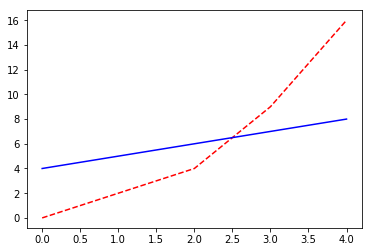

In [247]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np

x = [0, 1, 2, 3, 4]
y = [0, 2, 4, 9, 16]
x2 = [0, 1, 2, 3, 4]
y2 = [4, 5, 6, 7, 8]
plt.plot(x, y, 'r--', x2, y2, 'b-')

## XBu4Lke6Cyh2UrLFIZW0jIo79sUT8EwtruJduMAknEUNhccNwY